In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Equations:

\begin{equation} \tag{1}
m_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} m_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} m_{i-1}^{(t-1)} - a_i^{(t)}
\end{equation}

\begin{equation*} \tag{2}
n_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} n_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} n_{i-1}^{(t-1)} - b_i^{(t)}
\end{equation*}

\begin{equation*} \tag{3}
(a_i^{(t)} + b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*} \tag{4}
(a_i^{(t)} + b_i^{(t)})^2 = a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

### Solving:

Strategy: at each time $t$, suppose we have $m_{i+1}^{(t-1)}$, $m_{i-1}^{(t-1)}$ and $n_{i+1}^{(t-1)}$, $n_{i-1}^{(t-1)}$. <br>
Then, first solve for $a_i^{(t)}$ and $b_i^{(t)}$ using eq (3) and eq (4). <br>
Plug into to eq (1) and eq (2) to solve for $m_{i}^{(t)}$ and $n_{i}^{(t)}$.

Equating (3) and (4):

\begin{equation*}
a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)}) = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{(m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})}{(n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})} b_i^{(t)}
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} b_i^{(t)}
\end{equation*}

where $\Delta m$ and $\Delta n$ are calculable constants obtained from previous timestep: 

\begin{equation*}
\Delta m = (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta n = (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

Expanding (3):

\begin{equation*}
(a_i^{(t)})^2 + 2 a_i^{(t)} b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

Substituting expression for $a_i^{(t)}$ in terms of $b_i^{(t)}$:

\begin{equation*}
(\frac{\Delta m}{\Delta n} b_i^{(t)})^2 + 2 (\frac{\Delta m}{\Delta n} b_i^{(t)}) b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} \Delta m
\end{equation*}

\begin{equation*}
(b_i^{(t)})^2 \left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right) = b_i^{(t)} \Delta m
\end{equation*}

if $b_i^{(t)} \neq 0$:

\begin{equation*}
b_i^{(t)} = \frac{\Delta m}{\left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right)}
\end{equation*}

\begin{equation*}
= \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

which means:

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

Finally, we can plugin values of $a_i^{(t)}$ and $b_i^{(t)}$ into eq (1) and eq (2) to obtain $m_i^{(t)}$ and $n_i^{(t)}$.

### Initialization:

#### Contants:
Left end = $-k$ <br>
Right end = $l$ <br>
Payoff factor = $\lambda$ <br>

#### Positional Boundary Values:
$n_{-k}^{(t)} = 1$ -------- $n_{l}^{(t)} = 0$ <br>
$m_{-k}^{(t)} = 0$ -------- $m_{l}^{(t)} = \lambda$ <br>
for all time step $t$ <br>

#### Time Boundary Values:
$m_i^{(0)} = \frac{\lambda}{k+l}(i+k)$ <br>
$n_i^{(0)} = \frac{l-i}{k+l}$ <br>
for all positions $-k \leq i \leq l$ <br>

In [13]:
k = 6      # left endpoint: -k
l = 6      # right endpoint: l
L = k+l+1    # total length: k+l
T = 100    # Time steps

# Note: position index i will be shifted
# before: left end = -k, middle = 0, right end = l
# now: left end = 0, middle = k, right end = k + l (= L)

m_lambda = 100000
n_lambda = m_lambda*.9999994


# initialize the m,n values are time t=0, 
# then iterate starting from t=1, use m(t-1), n(t-1) to compute a(t) and b(t) 
# then use a(t) and b(t) to compute m(t) and n(t)

# Each matrix: vertical axis (rows): time step, horizontal axis (colunmns): position
# Therefore, m[t][i] access m value at time t, position index i
a = np.zeros(T*L).reshape((T, L))
b = np.zeros(T*L).reshape((T, L))
m = np.zeros(T*L).reshape((T, L))
n = np.zeros(T*L).reshape((T, L))

# Initialize positional boundary values
for t in range(a.shape[0]):
    n[t][0] = n_lambda
    m[t][0] = 0
    n[t][L-1] = 0
    m[t][L-1] = m_lambda
    
# Initialize time boundary values
for i in range(L):
    t = i / (L - 1)
    
    if i == 0:
        m[0][i] = 0
        n[0][i] = n_lambda
    elif i == L - 1:
        m[0][i] = m_lambda
        n[0][i] = 0
    else:
        midpoint = L // 2
        m[0][i] = m_lambda * (np.arctan(10 * t - 5) / np.pi + 0.5)
        n[0][i] = n_lambda * (np.arctan(5-10 * t) / np.pi + 0.5)

In [14]:
m[0]

array([     0.        ,   7497.62960044,   9277.35790777,  12111.89415908,
        17202.08696226,  27885.79383763,  50000.        ,  72114.20616237,
        82797.91303774,  87888.10584092,  90722.64209223,  92502.37039956,
       100000.        ])

In [11]:
m[1]

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0., 100000.])

In [16]:
n[0]

array([99999.94      , 92502.31489814, 90722.58765864, 87888.05310805,
       82797.86335899, 72114.16289385, 49999.97      , 27885.77710615,
       17202.07664101, 12111.88689195,  9277.35234136,  7497.62510186,
           0.        ])

In [23]:
n[1]

array([90000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.])

In [3]:
# Recursive solving algorithm

DEBUG = True

for t in range(1, T):
    if DEBUG:
        print(f"-------------- step {t} --------------")
    for i in range(1, L-1):
        delta_m = m[t-1][i+1] - m[t-1][i-1]
        delta_n = n[t-1][i-1] - n[t-1][i+1]
        # Compute a,b using previous m,n
        b[t][i] = delta_m / (((delta_m / delta_n) + 1))
        b[t][i] /= ((delta_m / delta_n) + 1)
        a[t][i] = (delta_m/delta_n) * b[t][i]
        # Compute current m,n using current a,b
        m[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*m[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*m[t-1][i-1] - a[t][i]
        n[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*n[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*n[t-1][i-1] - b[t][i]
        
        if DEBUG:
            print("Previous m, n:")
            print(m[t-1][i+1], m[t-1][i-1], n[t-1][i+1], n[t-1][i-1])
            print("Delta m, Delta n:")
            print(delta_m, delta_n)
            print("Current a, b:")
            print(a[t][i], b[t][i])
            print("Current m, n:")
            print(m[t][i], n[t][i])

-------------- step 1 --------------
Previous m, n:
16666.666666666668 0.0 83333.28333333333 99999.94
Delta m, Delta n:
16666.666666666668 16666.656666666677
Current a, b:
4166.666666666291 4166.664166666294
Current m, n:
4166.669166667791 87499.94500000113
Previous m, n:
25000.0 8333.333333333334 74999.955 91666.61166666666
Delta m, Delta n:
16666.666666666664 16666.656666666662
Current a, b:
4166.666666666291 4166.664166666291
Current m, n:
12500.002500001125 79166.61666666779
Previous m, n:
33333.333333333336 16666.666666666668 66666.62666666666 83333.28333333333
Delta m, Delta n:
16666.666666666668 16666.656666666662
Current a, b:
4166.666666666291 4166.66416666629
Current m, n:
20833.335833334466 70833.28833333445
Previous m, n:
41666.66666666667 25000.0 58333.29833333333 74999.955
Delta m, Delta n:
16666.66666666667 16666.65666666667
Current a, b:
4166.666666666293 4166.664166666293
Current m, n:
29166.669166667794 62499.96000000113
Previous m, n:
50000.0 33333.333333333336 49999

In [14]:
a[99]

array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.])

In [15]:
b[99]

array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.])

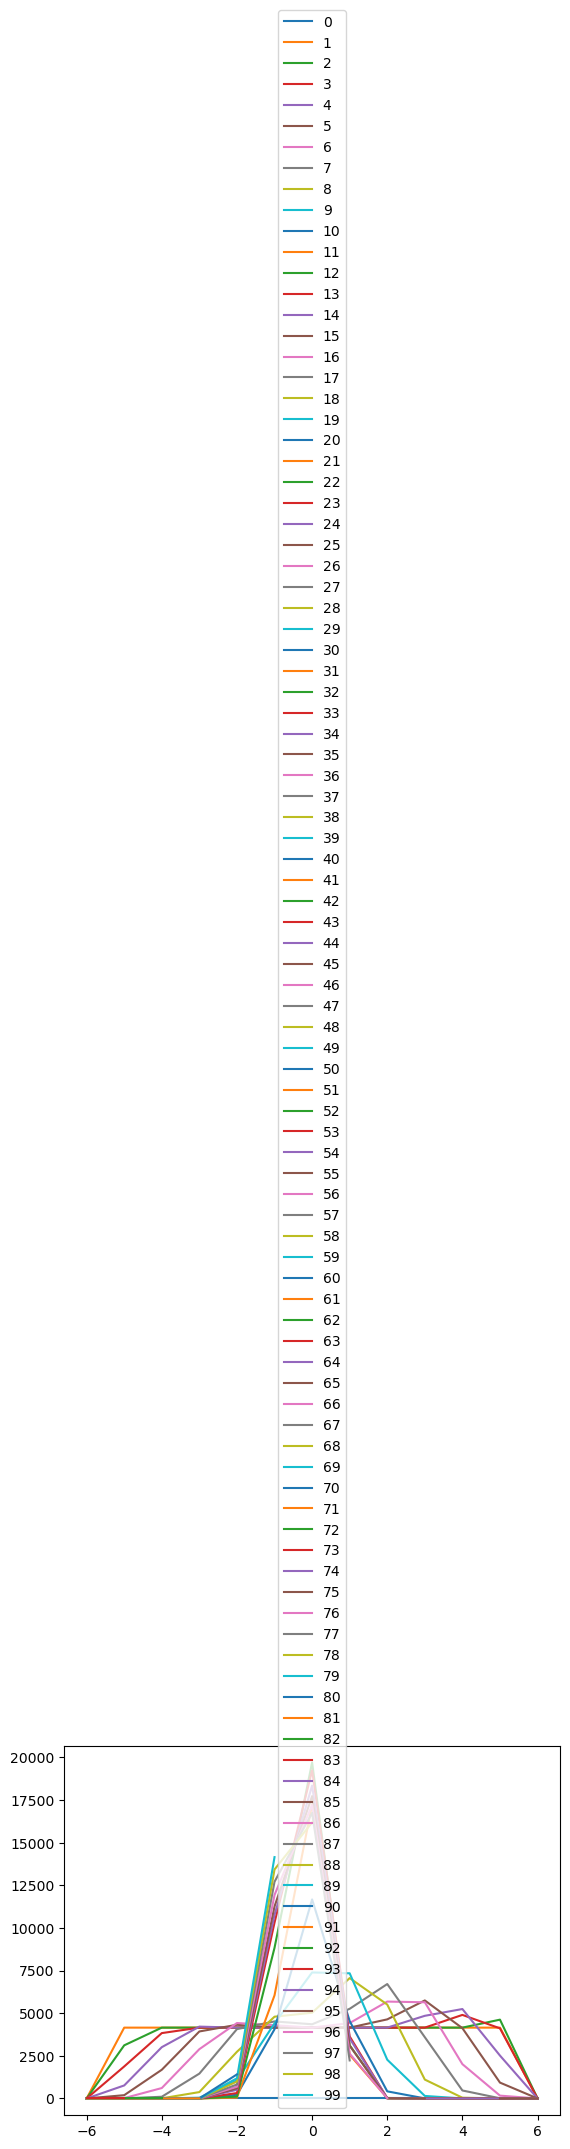

In [16]:
for t, a_line in enumerate(a):
    plt.plot(list(range(-k,l+1)), a_line, label=t)

plt.legend()
plt.show()

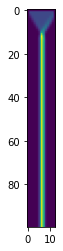

In [144]:
plt.imshow(a)

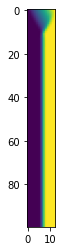

In [145]:
plt.imshow(m)